## Objective Function

In [1]:
# Object function
def objective(x, y):
    return x**2.0 + y**2.0

## 3D Plot of objective function

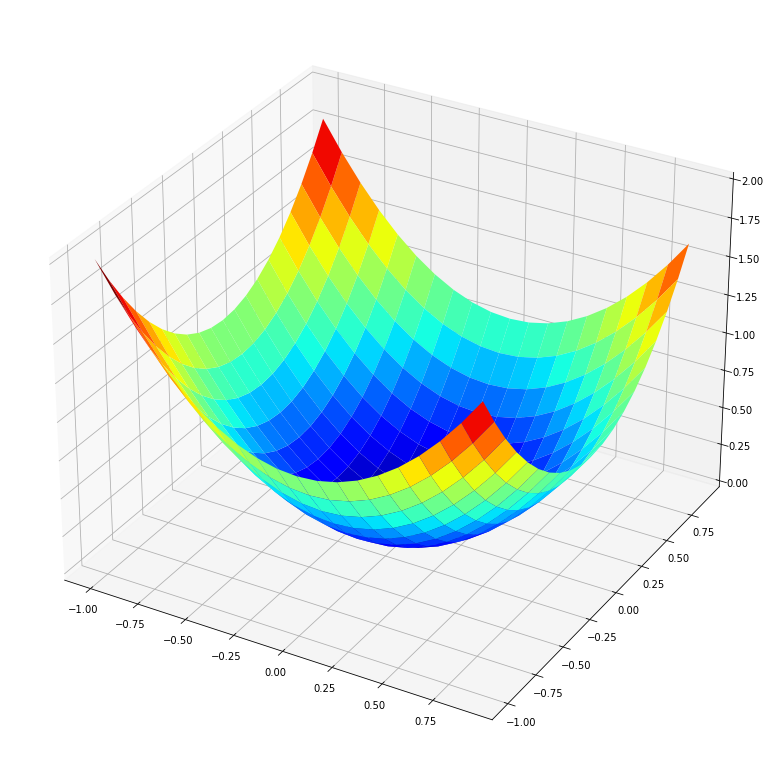

In [2]:
# 3d plot of the test function
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot


# define range for input
r_min, r_max = -1.0, 1.0

# sample input range uniformly at 0.1 increments
x_axis = arange(r_min, r_max, 0.1)
y_axis = arange(r_min, r_max, 0.1)

# create a mesh from the axis
x, y = meshgrid(x_axis, y_axis)

# compute targets
results = objective(x, y)

# create a surface plot with the jet color scheme
figure = pyplot.figure(figsize=(16,14))
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')

# show the plot
pyplot.show()

## 2D Plot of objective function

<function matplotlib.pyplot.show(close=None, block=None)>

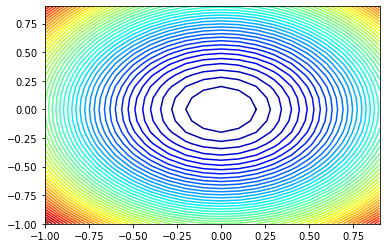

In [26]:
# contour plot of the test function
from numpy import asarray
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot


# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])

# sample input range uniformly at 0.1 increments
x_axis = arange(bounds[0,0], bounds[0,1], 0.1)
y_axis = arange(bounds[1,0], bounds[1,1], 0.1)

# create a mesh from the axis
x, y = meshgrid(x_axis, y_axis)

# compute targets
results = objective(x, y)

# create a filled contour plot with 50 levels and jet color scheme
pyplot.contour(x, y, results, levels=50, cmap='jet')

# show th plot
pyplot.show

## First Derivative from Objective Function

In [4]:
# derivative of objective function
def derivative(x, y):
    return asarray([x*2.0, y*2.0])

## Initial Setup

In [34]:
from math import sqrt
from numpy import asarray
from numpy.random import rand
from numpy.random import seed

# seed the pseudo random number generator
seed(1)

# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])

# define the total iterations
n_iter = 60

# step size - alpha
alpha = 0.2

# factor for average gradient - beta1
beta1 = 0.8

# factor for average squared gradient - beta2
beta2 = 0.999

## Gradient descent algorithm with adam

In [6]:
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
    
    # generate an initial point 
    x = bounds[:, 0] + rand(len(bounds)) * (bounds[:,1] - bounds[:,0])
    
    score = objective(x[0], x[1])
    
    # initialize first and second moments
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]
    
    # run the gradient descent updates
    for t in range(n_iter):
        
        # calculate gradient g(t)
        g = derivative(x[0], x[1])
        
        # build a solution one variable at a time
        for i in range(x.shape[0]):
            
            # m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            
            # v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
            
            # mhat(t) = m[i] / (1 - beta1(t))
            mhat = m[i] / (1.0 - beta1**(t+1))
            
            # vhat(t) = v(t) / (1 - beta2(t))
            vhat = v[i] / (1.0 - beta2**(t+1))
            
            # x(t) = x(t+1) - alpha * mhat(t) / (sqrt(vhat(t)) + eps)
            x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
            
        # evaluate candidate point
        score = objective(x[0], x[1])
        
        # report progress
        # print('>%d f(%s) = %.5f' % (t, x, score))
    
    return [x, score]

## Execution

In [7]:
best, score = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)
print('Done')
print('f(%s) = %f' % (best, score))

Done
f([0.00021372 0.00050607]) = 0.000000


## Plotting the progress of the Adam search

### Adam algorithm v2

In [29]:
def adam_v2(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
    
    solutions = list()
    
    # generate an initial point
    x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])
    
    # initialize first and second moments
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]
    
    # run the gradient descent updates
    for t in range(n_iter):
        
        # calculate gradient g(t)
        g = derivative(x[0], x[1])
        
        # build a solution one variable at a time
        for i in range(bounds.shape[0]):
            
            # m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            
            # v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
            v[i] = beta2 * v[i] + (1 - beta2) * g[i]**2
            
            # mhat = m[i] / (1 - beta1(t))
            mhat = m[i] / (1 - beta1**(t+1))
            
            # vhat = v(t) / (1 - beta2(t))
            vhat = v[i] / (1.0 - beta2**(t+1))
            
            # x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + ep)
            x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
            
        # evaluate candidate point
        score = objective(x[0], x[1])

        # keep track of solution
        solutions.append(x.copy())

        # report progress
        # print('>%d f(%s) = %.5f' % (t, x, score))
        
    return solutions

### Generating points to plot

In [35]:
solutions = asarray(adam_v2(objective, derivative, bounds, n_iter, alpha, beta1, beta2))

### Plotting points

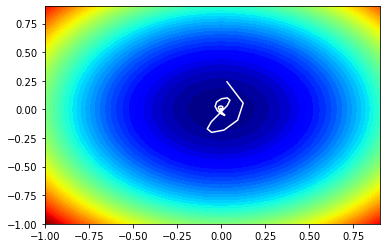

In [36]:
# create a filled contour plot with 2000 levels and jet colot scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')

# plot the sample as black circles
pyplot.plot(solutions[:, 0], solutions[:, 1], '-', color='w')

#### Copyright to https://machinelearningmastery.com/adam-optimization-from-scratch/